In [1]:
import pandas as pd 
from glob import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC

In [2]:
filtered_columns =  ['Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Type_ID',
 'Surf_Cond_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Surf_Type_ID',
 'Crash_Sev_ID']

In [3]:
predictor_columns =  ['Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Type_ID',
 'Surf_Cond_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Surf_Type_ID']

In [4]:
root = "extract_public_2018_20200825003448226_69851_20190101-20191231Texas/"
files = glob(root + '*/*_crash_*.csv')
get_df = lambda f: pd.read_csv(f)
dfdict = {f: pd.read_csv(f) for f in files}
df = pd.concat(dfdict)
df.reset_index()

,level_0,level_1,Crash_ID,Crash_Fatal_Fl,Cmv_Involv_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Amend_Supp_Fl,Active_School_Zone_Fl,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
0,extract_public_2018_20200825003448226_69851_20...,0,15657177,N,N,N,N,N,Y,N,...,0,0,0,1,0,0,NaN,35.0,NaN,NaN
1,extract_public_2018_20200825003448226_69851_20...,1,16406486,N,N,N,N,N,Y,N,...,0,0,1,1,0,0,NaN,23.0,NaN,NaN
2,extract_public_2018_20200825003448226_69851_20...,2,16473665,N,N,N,N,N,Y,N,...,1,0,1,0,1,0,NaN,35.0,NaN,NaN
3,extract_public_2018_20200825003448226_69851_20...,3,16871051,N,Y,N,N,N,Y,N,...,0,0,2,0,0,0,282.0,NaN,NaN,NaN
4,extract_public_2018_20200825003448226_69851_20...,4,16995273,N,N,N,N,N,Y,N,...,0,1,6,0,1,0,15.0,53.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,extract_public_2018_20200825003448226_69851_20...,54572,17777131,N,N,N,N,N,N,N,...,0,0,0,2,0,0,NaN,29.0,14.0,NaN
648333,extract_public_2018_20200825003448226_69851_20...,54573,17779640,N,N,N,N,N,N,N,...,0,0,2,0,0,0,15.0,NaN,NaN,NaN
648334,extract_public_2018_20200825003448226_69851_20...,54574,17783015,N,N,N,N,N,N,N,...,0,0,0,1,0,0,NaN,411.0,NaN,NaN
648335,extract_public_2018_20200825003448226_69851_20...,54575,17801355,N,N,N,N,N,N,N,...,0,0,1,0,0,0,15.0,NaN,NaN,NaN


In [5]:
df_filtered = df[filtered_columns]

In [6]:
df_filtered = df_filtered.replace(to_replace=r'^N$', value=0, regex=True)
df_filtered = df_filtered.replace(to_replace=r'^Y$', value=1, regex=True)


df_filtered = df_filtered.replace(to_replace=r'^MON$', value=1, regex=True)
df_filtered = df_filtered.replace(to_replace=r'^TUE$', value=2, regex=True)
df_filtered = df_filtered.replace(to_replace=r'^WED$', value=3, regex=True)
df_filtered = df_filtered.replace(to_replace=r'^THU$', value=4, regex=True)
df_filtered = df_filtered.replace(to_replace=r'^FRI$', value=5, regex=True)
df_filtered = df_filtered.replace(to_replace=r'^SAT$', value=6, regex=True)
df_filtered = df_filtered.replace(to_replace=r'^SUN$', value=7, regex=True)

In [7]:
df_filtered = df_filtered[df_filtered.Crash_Sev_ID != 0]

In [8]:
for i in df_filtered.columns.to_list():
    if df_filtered[i].dtype == 'str': df_filtered[i].fillna(df[i].mean(), inplace = True)

In [18]:
df_filtered = df_filtered.dropna()

In [10]:
for i in df_filtered.columns.to_list():
    if df_filtered[i].dtype != 'object': df_filtered[i].fillna(df[i].mean(), inplace = True)

In [22]:
df_filtered.Crash_Speed_Limit.value_counts()

 45    57095
 60    30751
 55    30083
 65    28999
 40    28291
 35    23321
 70    22669
 75    19521
 50    18585
 30    13174
-1     10586
 80     1118
 25      276
 20      258
 5       206
 15      160
 10      109
 85       26
 6         8
 34        6
 44        5
 69        3
 64        3
 66        3
 46        3
 62        3
 32        2
 56        2
 49        2
 77        1
 79        1
 68        1
 42        1
 48        1
 59        1
 23        1
 67        1
 61        1
 7         1
 63        1
 43        1
Name: Crash_Speed_Limit, dtype: int64

In [25]:
df_filtered = df_filtered[df_filtered['Crash_Speed_Limit']!=-1]

In [26]:
count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = df_filtered.Crash_Sev_ID.value_counts()
df_class_1 = df_filtered[df_filtered['Crash_Sev_ID'] == 1]
df_class_2 = df_filtered[df_filtered['Crash_Sev_ID'] == 2]
df_class_3 = df_filtered[df_filtered['Crash_Sev_ID'] == 3]
df_class_4 = df_filtered[df_filtered['Crash_Sev_ID'] == 4]
df_class_5 = df_filtered[df_filtered['Crash_Sev_ID'] == 5]

In [27]:
df_class_5_under = df_class_5.sample(count_class_5)
df_class_3_under = df_class_3.sample(count_class_5)
df_class_2_under = df_class_2.sample(count_class_5)
df_class_1_under = df_class_1.sample(count_class_5)

In [28]:
df_test_under = pd.concat([df_class_5_under, df_class_3_under, df_class_2_under, df_class_1_under, df_class_4], axis=0)

In [29]:
df_class_5_over = df_class_5.sample(count_class_1, replace=True)
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_class_3_over = df_class_3.sample(count_class_1, replace=True)
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
df_class_1_over = df_class_1.sample(count_class_1, replace=True)

In [30]:
df_test_over = pd.concat([df_class_4_over, df_class_3_over, df_class_2_over, df_class_1_over, df_class_5], axis=0)

In [31]:
df_test_over.head()

,,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone_Fl,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Wthr_Cond_ID,Light_Cond_ID,Road_Type_ID,Surf_Cond_ID,Intrsct_Relat_ID,FHE_Collsn_ID,Obj_Struck_ID,Othr_Factr_ID,Road_Part_Adj_ID,Road_Cls_ID,Road_Relat_ID,Phys_Featr_1_ID,Phys_Featr_2_ID,Surf_Type_ID,Crash_Sev_ID
extract_public_2018_20200825003448226_69851_20190101-20191231Texas/extract_public_2018_20200825003448226_69851_20190817-20191009Texas/extract_public_2018_20200825003448_crash_20190817-20191009Texas.csv,20577,0,45,0,0,0,11,4,2.0,1,4,1,64,54,2,2,1,21,21,6.0,4
extract_public_2018_20200825003448226_69851_20190101-20191231Texas/extract_public_2018_20200825003448226_69851_20191202-20191231Texas/extract_public_2018_20200825003448_crash_20191202-20191231Texas.csv,8499,0,60,0,0,0,11,1,3.0,1,4,30,64,54,1,5,1,21,21,2.0,4
extract_public_2018_20200825003448226_69851_20190101-20191231Texas/extract_public_2018_20200825003448226_69851_20190817-20191009Texas/extract_public_2018_20200825003448_crash_20190817-20191009Texas.csv,84124,0,70,0,0,0,11,1,1.0,1,4,21,64,7,1,2,1,21,21,2.0,4
extract_public_2018_20200825003448226_69851_20190101-20191231Texas/extract_public_2018_20200825003448226_69851_20191202-20191231Texas/extract_public_2018_20200825003448_crash_20191202-20191231Texas.csv,34484,0,60,0,0,1,11,1,3.0,1,1,34,64,54,1,2,1,21,21,5.0,4
extract_public_2018_20200825003448226_69851_20190101-20191231Texas/extract_public_2018_20200825003448226_69851_20190817-20191009Texas/extract_public_2018_20200825003448_crash_20190817-20191009Texas.csv,30485,0,65,1,0,0,11,1,2.0,1,4,20,64,49,1,1,1,21,21,6.0,4


In [56]:
X = df_test_over[predictor_columns].values
y = df_test_over["Crash_Sev_ID"]
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = 25)
crashTree.fit(X_trainset,y_trainset)
predTree = crashTree.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7223548779665707


Confusion matrix:
 [[49070  1351  1797  3224   787]
 [ 4197 41209  6369  2069  3006]
 [ 3408  6345 39486  1357  5673]
 [  551   167   306 55171   211]
 [ 4196  8930 15611  1908 25450]]


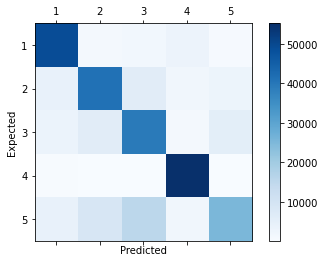

In [43]:
conf_mat = confusion_matrix(y_true=y_testset, y_pred=predTree)
print('Confusion matrix:\n', conf_mat)

labels = ['1', '2', '3', '4', '5']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

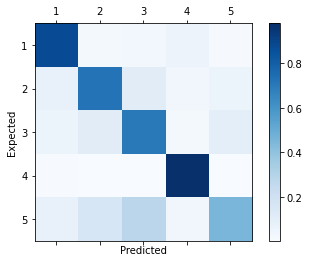

In [44]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_testset, predTree)
CM = CM / CM.astype(np.float).sum(axis=1)
labels = ['1', '2', '3', '4', '5']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(CM, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [45]:
unique_elements, counts_elements = np.unique(predTree, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    1     2     3     4     5]
 [61422 58002 63569 63729 35127]]


In [46]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_testset, predTree)

0.7464493398947664

In [47]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_testset, predTree, average=None)

array([0.87268136, 0.72487247, 0.7017363 , 0.97810517, 0.45369463])

In [48]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_testset, predTree, average=None)

array([0.79889942, 0.7104755 , 0.62115182, 0.86571263, 0.72451391])

In [49]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_testset, predTree, average=None)

array([0.83416206, 0.71760178, 0.65898964, 0.91848337, 0.55797943])

In [52]:
X_test = df_test_over[predictor_columns].values
y_hat = crashTree.predict(X_test)
y_true = df_test_over["Crash_Sev_ID"]

In [54]:
error = np.mean( y_hat != y_true )
error

0.21492184631105007

In [58]:
X = df_test_over[predictor_columns].values
y = df_test_over["Crash_Sev_ID"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

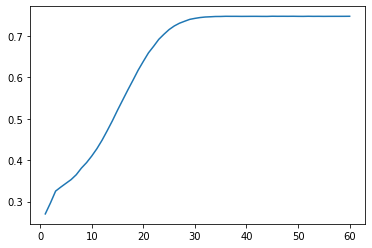

In [73]:
max_depths = np.linspace(1, 60, 60, endpoint=True)
train_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_test)
   train_pred_score = metrics.accuracy_score(y_test, train_pred)
   train_results.append(train_pred_score)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results)
plt.show()

In [74]:
X = df_test_over[predictor_columns].values
y = df_test_over["Crash_Sev_ID"]
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = 28)
crashTree.fit(X_trainset,y_trainset)
predTree = crashTree.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7397294295881838


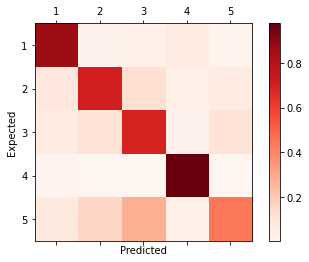

In [79]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_testset, predTree)
CM = CM / CM.astype(np.float).sum(axis=1)
labels = ['1', '2', '3', '4', '5']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(CM, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()